# HOTEL RECOMMENDATION SYSTEM USING KNN COLLABORATIVE FILTERING

In [35]:
import numpy as np               # Python library for numerical computation (that is basically used to perform operations on arrays and matrices)
import pandas as pd              # Python library for easy to use data structures
import scipy as sp               # Python library for numerical algorithms
from matplotlib import pyplot    # Python library for plotting data
import matplotlib.pyplot as plt  #python library to plot data
import seaborn as sns            # Python library based on matplotlib 
import missingno as msno         # Python library to detect missing numbers 

In [36]:

pd.set_option('display.max_colwidth',100)

# This data is available on open online source. the original data contains around 100000 data. However, for simplicity of implementation I used first 10000 data

# To read data from CSV file which is used for this Hotel recommendation system
data = pd.read_csv('Hotel_Reviews.csv')

# To show the data of CSV file
data.head()



,Hotel_Id,Property_Name,Review_Title,Review_Text,Location_of _The _Reviewer,Date_Of_Review
0,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012
1,2.000,Corinthia Hotel London,"By far, my best hotel in the world",I had a pleasure of staying in this hotel for 7 nights recently. This hotel was perfect in every...,"Savannah, Georgia",3/23/2016
2,3.000,The Savoy,First visit to the American Bar at the Savoy,"A very lovely first visit to this iconic hotel bar! | Wonderful service, without being intrusive...",London,7/30/2013
3,4.000,Rhodes Hotel,Nice stay,"3 of us stayed at the Rhodes Hotel for 4 nights, its a great location for taking the Paddington ...","Maui, Hawaii",06/02/2012
4,5.000,The Savoy,Perfection,Form the moment we arrived until we left we experienced absolute perfection in service excellanc...,"London, United Kingdom",11/24/2017


In [37]:
# This command will indicate list of all columns used in CSV 
data.columns


Index(['Hotel_Id', 'Property_Name', 'Review_Title', 'Review_Text',
       'Location_of _The _Reviewer', 'Date_Of_Review'],
      dtype='object')

In [38]:
# This command provides total descriptions of CSV
data.describe()

,Hotel_Id
count,9999.000
mean,5000.000
std,2886.607
min,1.000
25%,2500.500
50%,5000.000
75%,7499.500
max,9999.000


In [39]:

data.describe(include='all')

,Hotel_Id,Property_Name,Review_Title,Review_Text,Location_of _The _Reviewer,Date_Of_Review
count,9999.000,9997,9997,9997,8575,9996
unique,nan,20,8674,9997,3297,3045
top,nan,The Savoy,Excellent,Beautiful decor and very comfortable beds with superb bed and bath linen. Great place to stay in...,"London, United Kingdom",10/03/2018
freq,nan,1995,42,1,722,19
mean,5000.000,NaN,NaN,NaN,NaN,NaN
std,2886.607,NaN,NaN,NaN,NaN,NaN
min,1.000,NaN,NaN,NaN,NaN,NaN
25%,2500.500,NaN,NaN,NaN,NaN,NaN
50%,5000.000,NaN,NaN,NaN,NaN,NaN
75%,7499.500,NaN,NaN,NaN,NaN,NaN


In [40]:
# Any dataset contains duplicate data. To calculate the aggregation of duplicate data values

print(sum(data.duplicated()))

17331


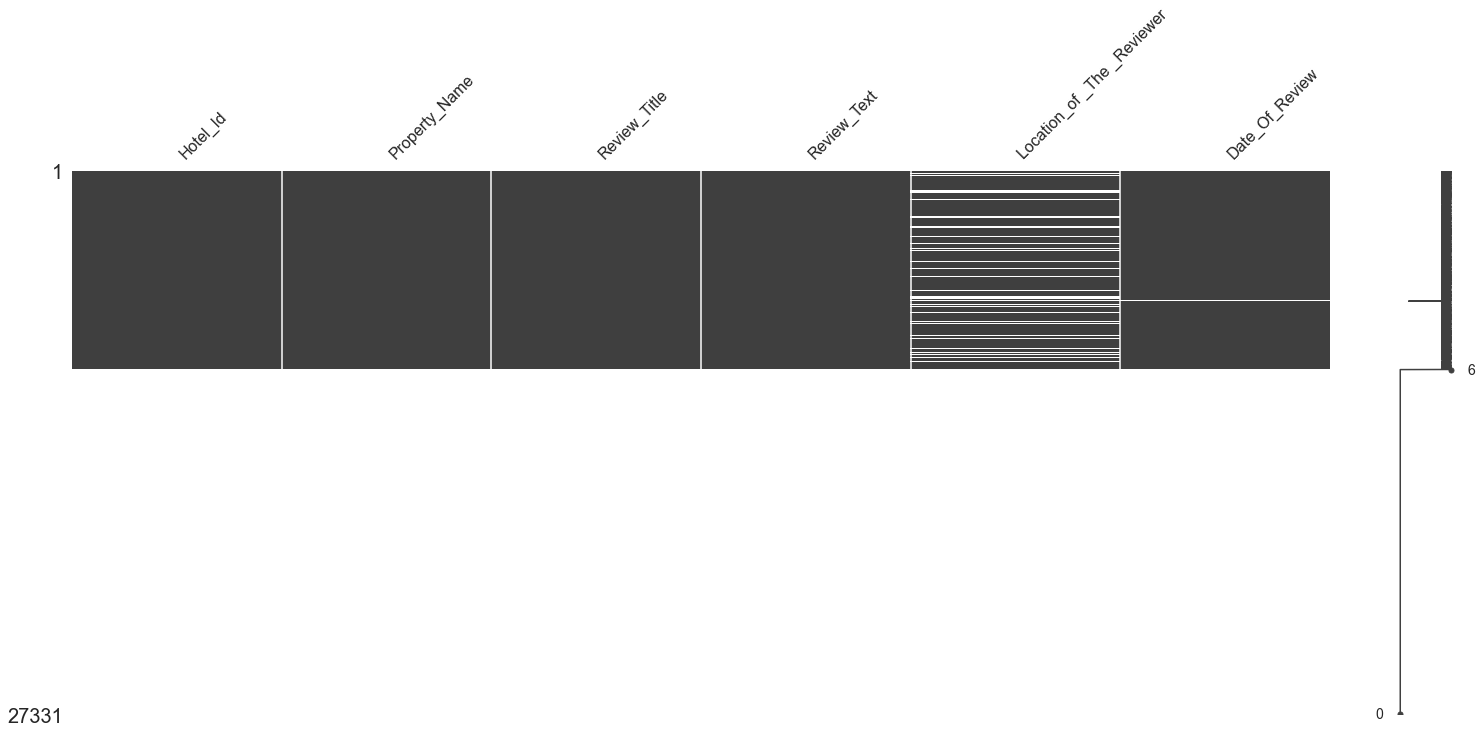

In [41]:
# Any data obtained is not pure. some of the features have missing values.
#To check the missing data from the dataset

msno.matrix(data)

In [42]:
# We do not need duplicates of the data. so this command gets rid from the duplicate data
data = data.drop_duplicates()

In [43]:
print(sum(data.duplicated())) # After dropping the duplicate values we need to check the sum of the duplicates in our dataset

0


In [44]:
# Easiest way to handle the missing value is by skipping/Dropping that missing value data
# below command will drop the missing values and will provide the pure data

data = data.dropna()

In [45]:
data.describe()

,Hotel_Id
count,8575.000
mean,4992.283
std,2887.016
min,1.000
25%,2491.500
50%,4984.000
75%,7501.500
max,9999.000


# Visualization of the data

In [46]:
#sns.distplot(data['Review_Rating']);

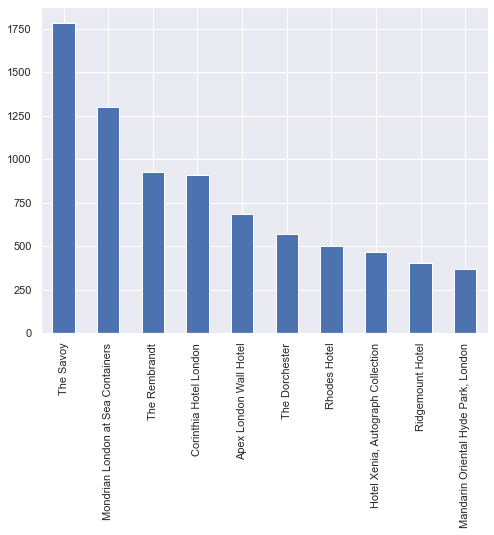

In [47]:
# The below graph provides visualization about which hotel has got maximum number of reviews 
# This provides top ten best hotels

Hotel_counts = data.Property_Name.value_counts()
Hotel_counts[:10].plot(kind='bar',figsize=(8,6))

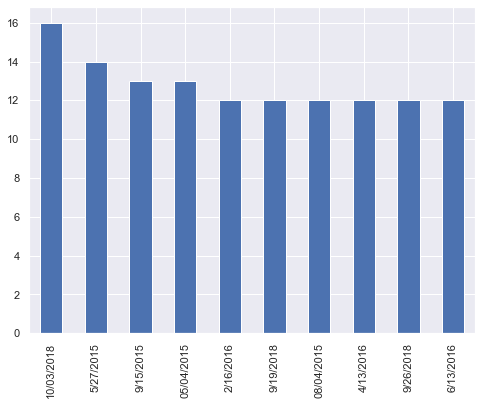

In [48]:
# the below bar graph provides analysis of data according to the date

Review_Date_count = data.Date_Of_Review.value_counts()
Review_Date_count[:10].plot(kind='bar', figsize = ( 8, 6))

In [49]:
# Another CSV file that provides only ratings according to the User_Id, and Hotel_Id

ratings = pd.read_csv('Ratings.csv')
ratings.head()

,User_Id,Hotel_Id,rating,timestamp
0,1,31,2.500,1260759144
1,1,1029,3.000,1260759179
2,1,1061,3.000,1260759182
3,1,1129,2.000,1260759185
4,1,1172,4.000,1260759205


In [50]:
# for collaborative filtering we are required to merge two datasets  in single  dataset in this project

df = pd.merge(data, ratings, on='Hotel_Id') # from  both of the data sets it keeps Hotel_Id as commensing
df.head()


,Hotel_Id,Property_Name,Review_Title,Review_Text,Location_of _The _Reviewer,Date_Of_Review,User_Id,rating,timestamp
0,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,7,3.000,851866703
1,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,9,4.000,938629179
2,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,13,5.000,1331380058
3,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,15,2.000,997938310
4,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,19,3.000,855190091


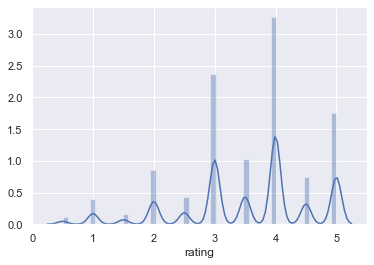

In [51]:
# sns plot of ratings
sns.distplot(df['rating']);

In [52]:
# create new dataset for average (mean) rating
new = pd.DataFrame()
new ['mean_rating'] = mean_rating

In [53]:
# to calculate the average rating of hotels

mean_rating  = df
mean_rating = mean_rating.groupby ('Property_Name') ['rating'].mean()
mean_rating

Property_Name
45 Park Lane - Dorchester Collection                             3.321
A To Z Hotel                                                     3.663
Apex London Wall Hotel                                           3.572
Bulgari Hotel, London                                            3.643
City View Hotel                                                  3.559
Corinthia Hotel London                                           3.564
Hartley Hotel                                                    3.775
Hotel Xenia, Autograph Collection                                3.568
London Guest House                                               3.596
Mandarin Oriental Hyde Park, London                              3.534
Marble Arch Hotel                                                3.555
Mondrian London at Sea Containers                                3.498
Newham Hotel                                                     3.669
Rhodes Hotel                                                   

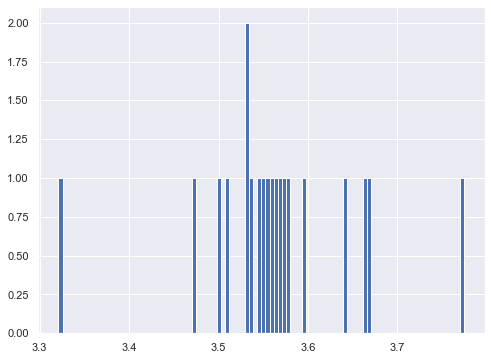

In [54]:
# plot mean_rating (Average rating) graph

plt.figure (figsize = (8,6))
new['mean_rating'].hist(bins = 100)

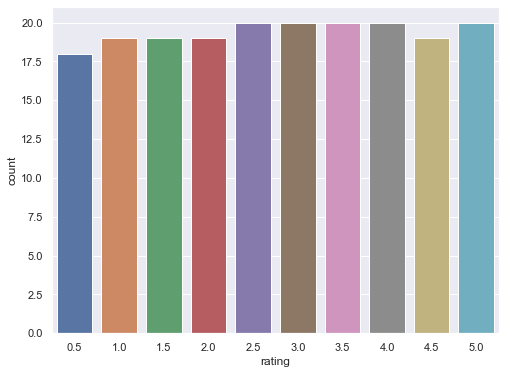

In [55]:
# This graph provides all the ratings 

Review_plot = df[["Property_Name","rating"]].drop_duplicates()
sns.set(font_scale = 1)
a4_dims = (8, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "rating",data=Review_plot)

# Collaborative filtering using KNN algorithm

In [56]:
# This code provides total number of counts

combine_hotel_rating = df.dropna(axis = 0, subset = ['Property_Name'])
hotel_ratingCount = (combine_hotel_rating.
     groupby(by = ['Property_Name'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['Property_Name', 'totalRatingCount']]
    )
hotel_ratingCount.head()

,Property_Name,totalRatingCount
0,45 Park Lane - Dorchester Collection,394
1,A To Z Hotel,873
2,Apex London Wall Hotel,6354
3,"Bulgari Hotel, London",1362
4,City View Hotel,17


In [57]:
rating_with_totalRatingCount = combine_hotel_rating.merge(hotel_ratingCount, left_on = 'Property_Name', right_on = 'Property_Name', how = 'left')
rating_with_totalRatingCount.head()

,Hotel_Id,Property_Name,Review_Title,Review_Text,Location_of _The _Reviewer,Date_Of_Review,User_Id,rating,timestamp,totalRatingCount
0,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,7,3.000,851866703,6354
1,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,9,4.000,938629179,6354
2,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,13,5.000,1331380058,6354
3,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,15,2.000,997938310,6354
4,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,19,3.000,855190091,6354


In [58]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(hotel_ratingCount['totalRatingCount'].describe())

count      20.000
mean     3620.950
std      3944.127
min        17.000
25%       545.000
50%      2066.500
75%      5924.250
max     13968.000
Name: totalRatingCount, dtype: float64


In [59]:
# the recommendation system works on the basis of popularity of ratings. For sake of simplicity I used popularity threshold.
# If the rating count of the hotel increases more than the popularity it will simply count that hotel as most popular hotel.

popularity_threshold = 50
rating_popular_hotels= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_hotels.head()

,Hotel_Id,Property_Name,Review_Title,Review_Text,Location_of _The _Reviewer,Date_Of_Review,User_Id,rating,timestamp,totalRatingCount
0,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,7,3.000,851866703,6354
1,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,9,4.000,938629179,6354
2,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,13,5.000,1331380058,6354
3,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,15,2.000,997938310,6354
4,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,19,3.000,855190091,6354


In [60]:

rating_popular_hotels.shape

(72402, 10)

In [61]:
# for the varification of raw echelon form, create pivot table

hotel_features_df=rating_popular_hotels.pivot_table(index='Property_Name',columns='User_Id',values='rating').fillna(0)
hotel_features_df.head()

User_Id,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
Property_Name,,,,,,,,,,,,,,,,,,,,,
45 Park Lane - Dorchester Collection,0.000,0.000,0.000,5.000,4.500,0.000,0.000,0.000,2.000,0.000,...,0.000,0.000,0.000,2.833,0.000,0.000,0.000,0.000,0.000,0.000
A To Z Hotel,0.000,0.000,0.000,4.250,3.500,0.500,0.000,3.500,4.000,0.000,...,0.000,0.000,3.500,4.000,0.000,0.000,0.000,0.000,4.000,4.500
Apex London Wall Hotel,3.000,3.667,3.500,4.455,3.722,2.500,3.833,3.688,3.833,3.000,...,3.400,4.000,3.974,3.531,2.000,3.833,3.000,3.750,3.200,4.150
"Bulgari Hotel, London",3.000,4.000,0.000,4.333,2.500,4.500,0.000,4.750,0.000,0.000,...,4.000,0.000,4.000,3.091,0.000,4.000,0.000,0.000,0.000,2.500
Corinthia Hotel London,2.500,4.000,3.500,4.417,3.800,3.600,3.000,3.833,3.571,3.800,...,3.429,0.000,3.891,3.190,3.000,4.000,5.000,3.600,4.000,3.958


In [62]:
# KNN is non paramatric lazy learning method. 
#for Item based filtering purpose KNN is best approch in collaborative filtering 

from scipy.sparse import csr_matrix

hotel_features_df_matrix = csr_matrix(hotel_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(hotel_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [63]:
hotel_features_df.shape

(19, 671)

In [64]:
#query index indicates the performance of the matrix

query_index = np.random.choice(hotel_features_df.shape[0])
print(query_index)
query_index =2

16


In [65]:
#In the K nearest neighbout algorithm generally distance is calculated from the quary node to the investigating node. 
# Investing node tries to find the nearest neighbour according to the shortest distance.
# In this project I iused  5 nearest neighbout fron investigating node

distances, indices = model_knn.kneighbors(hotel_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [66]:
hotel_features_df.head()

User_Id,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
Property_Name,,,,,,,,,,,,,,,,,,,,,
45 Park Lane - Dorchester Collection,0.000,0.000,0.000,5.000,4.500,0.000,0.000,0.000,2.000,0.000,...,0.000,0.000,0.000,2.833,0.000,0.000,0.000,0.000,0.000,0.000
A To Z Hotel,0.000,0.000,0.000,4.250,3.500,0.500,0.000,3.500,4.000,0.000,...,0.000,0.000,3.500,4.000,0.000,0.000,0.000,0.000,4.000,4.500
Apex London Wall Hotel,3.000,3.667,3.500,4.455,3.722,2.500,3.833,3.688,3.833,3.000,...,3.400,4.000,3.974,3.531,2.000,3.833,3.000,3.750,3.200,4.150
"Bulgari Hotel, London",3.000,4.000,0.000,4.333,2.500,4.500,0.000,4.750,0.000,0.000,...,4.000,0.000,4.000,3.091,0.000,4.000,0.000,0.000,0.000,2.500
Corinthia Hotel London,2.500,4.000,3.500,4.417,3.800,3.600,3.000,3.833,3.571,3.800,...,3.429,0.000,3.891,3.190,3.000,4.000,5.000,3.600,4.000,3.958


In [67]:
# As we know and definition of the recommendation system suggests, system provides recommendation of the item mpnitoring the past reviews and provides best recommendation
# In this example, it provides 5 best hotels according to the past reviews, threshold value of ratings

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(hotel_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, hotel_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Apex London Wall Hotel:

1: The Savoy, with distance of 0.042265014175343674:
2: Mondrian London at Sea Containers, with distance of 0.048164048445181074:
3: Corinthia Hotel London, with distance of 0.051186291913753235:
4: The Rembrandt, with distance of 0.05619541897175451:
5: The Dorchester, with distance of 0.06766729650371717:
